In [195]:
# Siddarth Sharma, siddarth.sharma@colorado.edu

In [196]:
import numpy as np
import pandas as pd

dataframe= pd.read_csv("screening_exercise_orders_v201810.csv")

In [197]:
dataframe.head(10)

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
5,1005,1,2017-01-01 10:08:05,338.00,0
6,1006,1,2017-01-01 15:42:57,1526.43,1
7,1007,0,2017-01-01 15:59:50,168.00,0
8,1008,0,2017-01-01 18:01:04,207.99,0
9,1009,1,2017-01-01 19:27:17,283.00,1


In [198]:
#checking for null values, since there are no Null values, no need to impute

dataframe.isnull().sum()

customer_id         0
gender              0
date                0
value               0
predicted_gender    0
dtype: int64

In [199]:
#A) Assemble a dataframe with one row per customer and the following columns:
#customer_id,gender, most_recent_order_date,order_count (number of orders placed by this customer)

f = {'date':'max','value':'count','gender':'first'}

per_customer=dataframe.groupby(['customer_id'], as_index=False).agg(f)
per_customer = per_customer.rename(columns={'value': 'order_count', 'predicted_gender': 'gender','date':'most_recent_order_dat'})
per_customer.head(10)

,customer_id,most_recent_order_dat,order_count,gender
0,1000,2017-01-01 00:11:31,1,0
1,1001,2017-01-01 00:29:56,1,0
2,1002,2017-02-19 21:35:31,3,1
3,1003,2017-04-26 02:37:20,4,1
4,1004,2017-01-01 03:11:54,1,0
5,1005,2017-12-16 01:39:27,2,1
6,1006,2017-05-09 15:27:20,3,1
7,1007,2017-01-01 15:59:50,1,0
8,1008,2017-12-17 05:47:48,3,0
9,1009,2017-01-01 19:27:17,1,1


In [149]:
# B _____________________________________________________________________________________________________________

In [200]:
dataframe.dtypes

customer_id           int64
gender                int64
date                 object
value               float64
predicted_gender      int64
dtype: object

In [201]:
# the data type of column date is obj, so we convert it to type:datetime and extract the week number from dates
#here the first week of the year is week 00 and last is week 52

# The first week consist of only one day ie 01-01-2017 becaue it is a sunday and new week is counted from Monday onwards, 
#so from 01-02-2017 (Monday), new week - 01 starts 

dataframe['date'] =  pd.to_datetime(dataframe['date'])
dataframe['Week_Number']=dataframe.date.dt.strftime('%W')
dataframe.head()

,customer_id,gender,date,value,predicted_gender,Week_Number
0,1000,0,2017-01-01 00:11:31,198.5,1,00
1,1001,0,2017-01-01 00:29:56,338.0,1,00
2,1002,1,2017-01-01 01:30:31,733.0,1,00
3,1003,1,2017-01-01 01:34:22,772.0,1,00
4,1004,0,2017-01-01 03:11:54,508.0,1,00


In [202]:
#subsetting the dataframe to extact only week number and order count

f = {'value':'count'}
per_week=dataframe.groupby(['Week_Number'], as_index=False).agg(f)
#per_week = per_customer.rename(columns={'value': 'order_count', 'predicted_gender': 'gender','date':'most_recent_order_dat'})
per_week.head(10)

,Week_Number,value
0,00,14
1,01,180
2,02,264
3,03,405
4,04,233
5,05,211
6,06,195
7,07,248
8,08,315
9,09,260


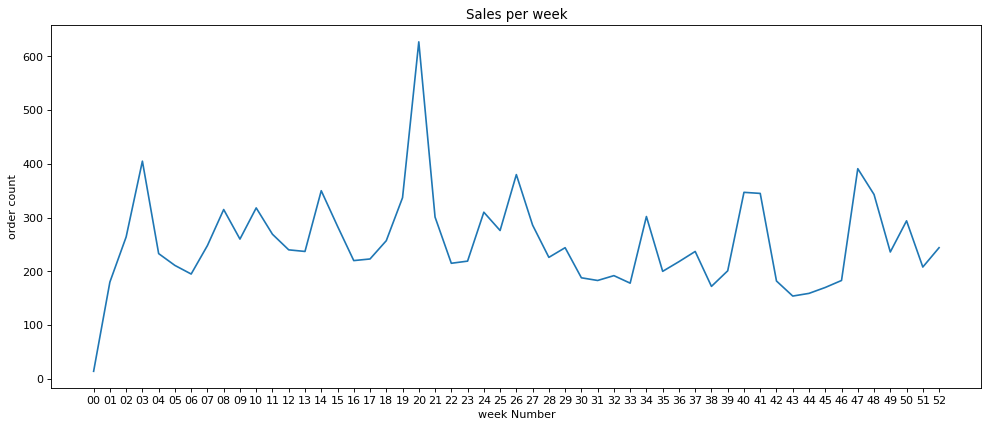

In [203]:
#B) Plot the count of orders per week for the store.

import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(per_week["Week_Number"], per_week["value"])
plt.title('Sales per week')
plt.xlabel('week Number')
plt.ylabel('order count')
plt.show()



In [ ]:
#week 20 had the highest order count

In [ ]:
# C-------------------------------------------------------------------------------------------------------------

In [204]:
#Subsetting the dataframe to create a dataframe of gender=1 adn another for gender =0

dataframe_1=dataframe[dataframe['gender'] == 1]
dataframe_0=dataframe[dataframe['gender'] == 0]

print("The mean value of purchases for gender 1 is:", dataframe_1["value"].mean() )
print("The mean value of purchases for gender 0 is:", dataframe_0["value"].mean() )

The mean value of purchases for gender 1 is: 350.70836114422
The mean value of purchases for gender 0 is: 363.89000591803506


In [205]:
#Choice of method: Since there are no null values, and Orders of value zero sohuld not be excluded, I simply segregated
# both the genders and used the mean function

In [206]:
# The differnece is insignificant ( approximately $13.2) , had the diffdernece been huge, 
#we would have focussed our marketing strategy exclusively on one gender, but there is no need to do so
# however one important insight is, the standard deviation of purchases of both the genders
# gender 0 not only had a higher mean value but alos a gretaer fluctuation between the purchase value

print("The Standard deviation value of purchases for gender 1 is:", dataframe_1["value"].std() )
print("The Standard deviation value of purchases for gender 0 is:", dataframe_0["value"].std() )

The Standard deviation value of purchases for gender 1 is: 377.5047374867077
The Standard deviation value of purchases for gender 0 is: 396.53321516246024


In [207]:
# D-----------------------------------------------------------------------------------------------------------------

In [191]:
#Since there are multiple records for the same customer and as mentione din the problem statement,  
#there is only one gender prediction for each customer, we remove the dupliacte records and keep only one record for a customer
#if we don't drop the dupliactes, we get a lower accuracy rate of almost 60%


dataframe_no_dupliactes = dataframe.drop_duplicates(subset=['customer_id'], keep='first')

In [208]:
df_confusion2 = pd.crosstab(dataframe_no_dupliactes['gender'],dataframe_no_dupliactes['predicted_gender'])
df_confusion2

predicted_gender,0,1
gender,,
0,2189,2218
1,895,3512


In [209]:
# TP= True poistive, FP= False positive , FN= False negative, TN = True Negative

In [210]:
TP = 3512
FP = 2218
TN = 2189
FN = 895

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


In [211]:
print("The True positive rate for gender predictions is:",  round((TPR*100),2),"%")
print("The True negative rate for gender predictions is:",  round((TNR*100),2),"%")
print("The accuarcy rate for gender predictions is:",  round((ACC*100),2),"%")

The True positive rate for gender predictions is: 79.69 %
The True negative rate for gender predictions is: 49.67 %
The accuarcy rate for gender predictions is: 64.68 %


In [194]:
#What does the confusion matrix tell you about the quality of the predictions?
#as we can see, the accuracy is very low, at 64%, the quality of prediction is poor and we should
#implement other machine learning algorithms to achieve a higher accuyracy  